In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ng_ai import NebulaReader
from ng_ai.config import NebulaGraphConfig

# read data with nebula/networkx engine, query mode
config_dict = {
    "graphd_hosts": "graphd:9669",
    "user": "root",
    "password": "nebula",
    "space": "basketballplayer",
}
config = NebulaGraphConfig(**config_dict)
reader = NebulaReader(engine="nebula", config=config)
reader.query(edges=["follow", "serve"], props=[["degree"], []])
g = reader.read()


/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Check ng_ai Graph result

In [3]:
g.show(10)

player102 -> player100 (0): {'degree': 75}
player102 -> player101 (0): {'degree': 75}
player102 -> team203 (0): {}
player102 -> team204 (0): {}
player100 -> player101 (0): {'degree': 95}
player100 -> player125 (0): {'degree': 95}
player100 -> team204 (0): {}
player101 -> player100 (0): {'degree': 95}
player101 -> player102 (0): {'degree': 90}
player101 -> player125 (0): {'degree': 95}


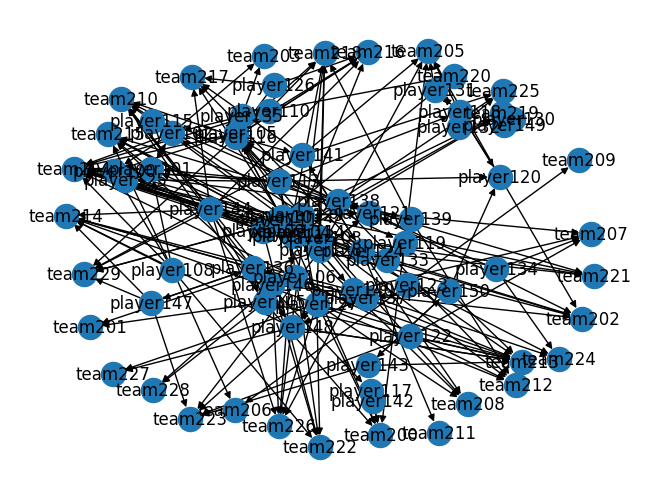

In [4]:
g.draw()

## Draw it with matplotlib

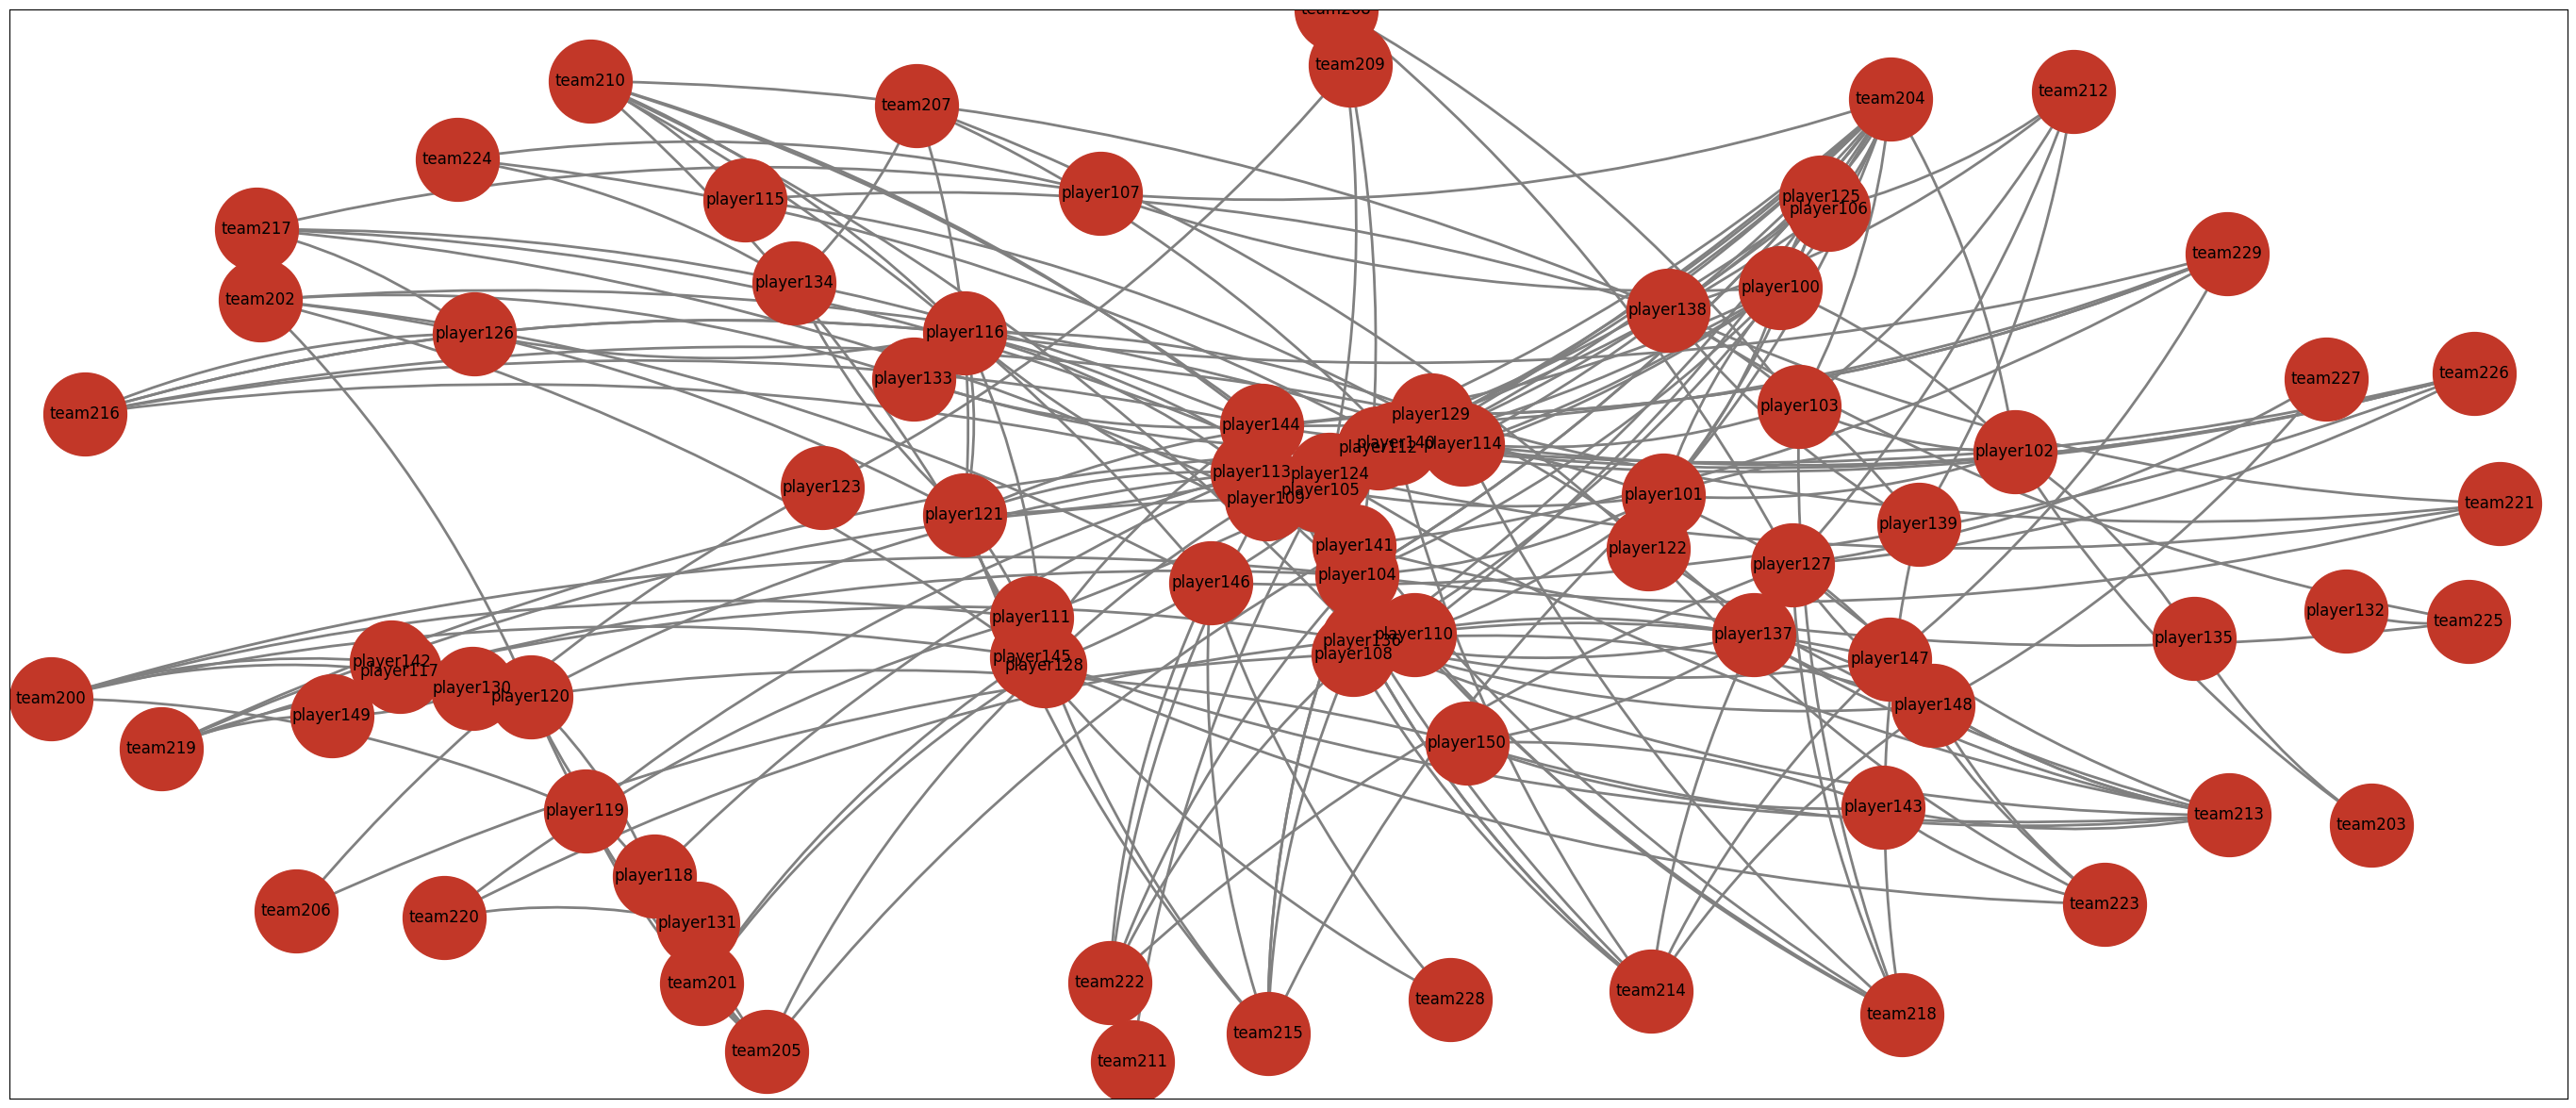

In [5]:
G = g.data

import networkx as nx
import matplotlib.pyplot as plt
import random

def draw_graph(G, colors=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]):
    # Define positions for the nodes
    pos = nx.spring_layout(G)

    # Create a figure and set the axis limits
    fig, ax = plt.subplots(figsize=(35, 15))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    # Draw the nodes and edges of the graph
    node_colors = {}
    for node in G.nodes():
        if 'label' in G.nodes[node]:
            label = G.nodes[node]['label']
        else:
            label = ''
        if label in node_colors:
            node_color = node_colors[label]
        else:
            node_color = random.choice(colors)
            node_colors[label] = node_color
        nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=[node], node_color=node_color, node_size=4000)
    
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color='gray', width=2, connectionstyle='arc3, rad=0.1', arrowstyle='-|>', arrows=True)

    # Extract edge labels as a dictionary
    edge_labels = nx.get_edge_attributes(G, 'label')

    # Add edge labels to the graph
    for edge, label in edge_labels.items():
        ax.text((pos[edge[0]][0] + pos[edge[1]][0])/2,
                (pos[edge[0]][1] + pos[edge[1]][1])/2,
                label, fontsize=12, color='black', ha='center', va='center')

    # Add node labels to the graph
    node_labels = {n: G.nodes[n]['label'] if 'label' in G.nodes[n] else n for n in G.nodes()}
    nx.draw_networkx_labels(G, pos=pos, ax=ax, labels=node_labels, font_size=12, font_color='black')

    # Show the figure
    plt.show()

draw_graph(G)

## Let's run PageRank and Louvain

In [6]:
pr_result = g.algo.pagerank(reset_prob=0.15, max_iter=10)
louvain_result = g.algo.louvain()

## Visualization of algo results

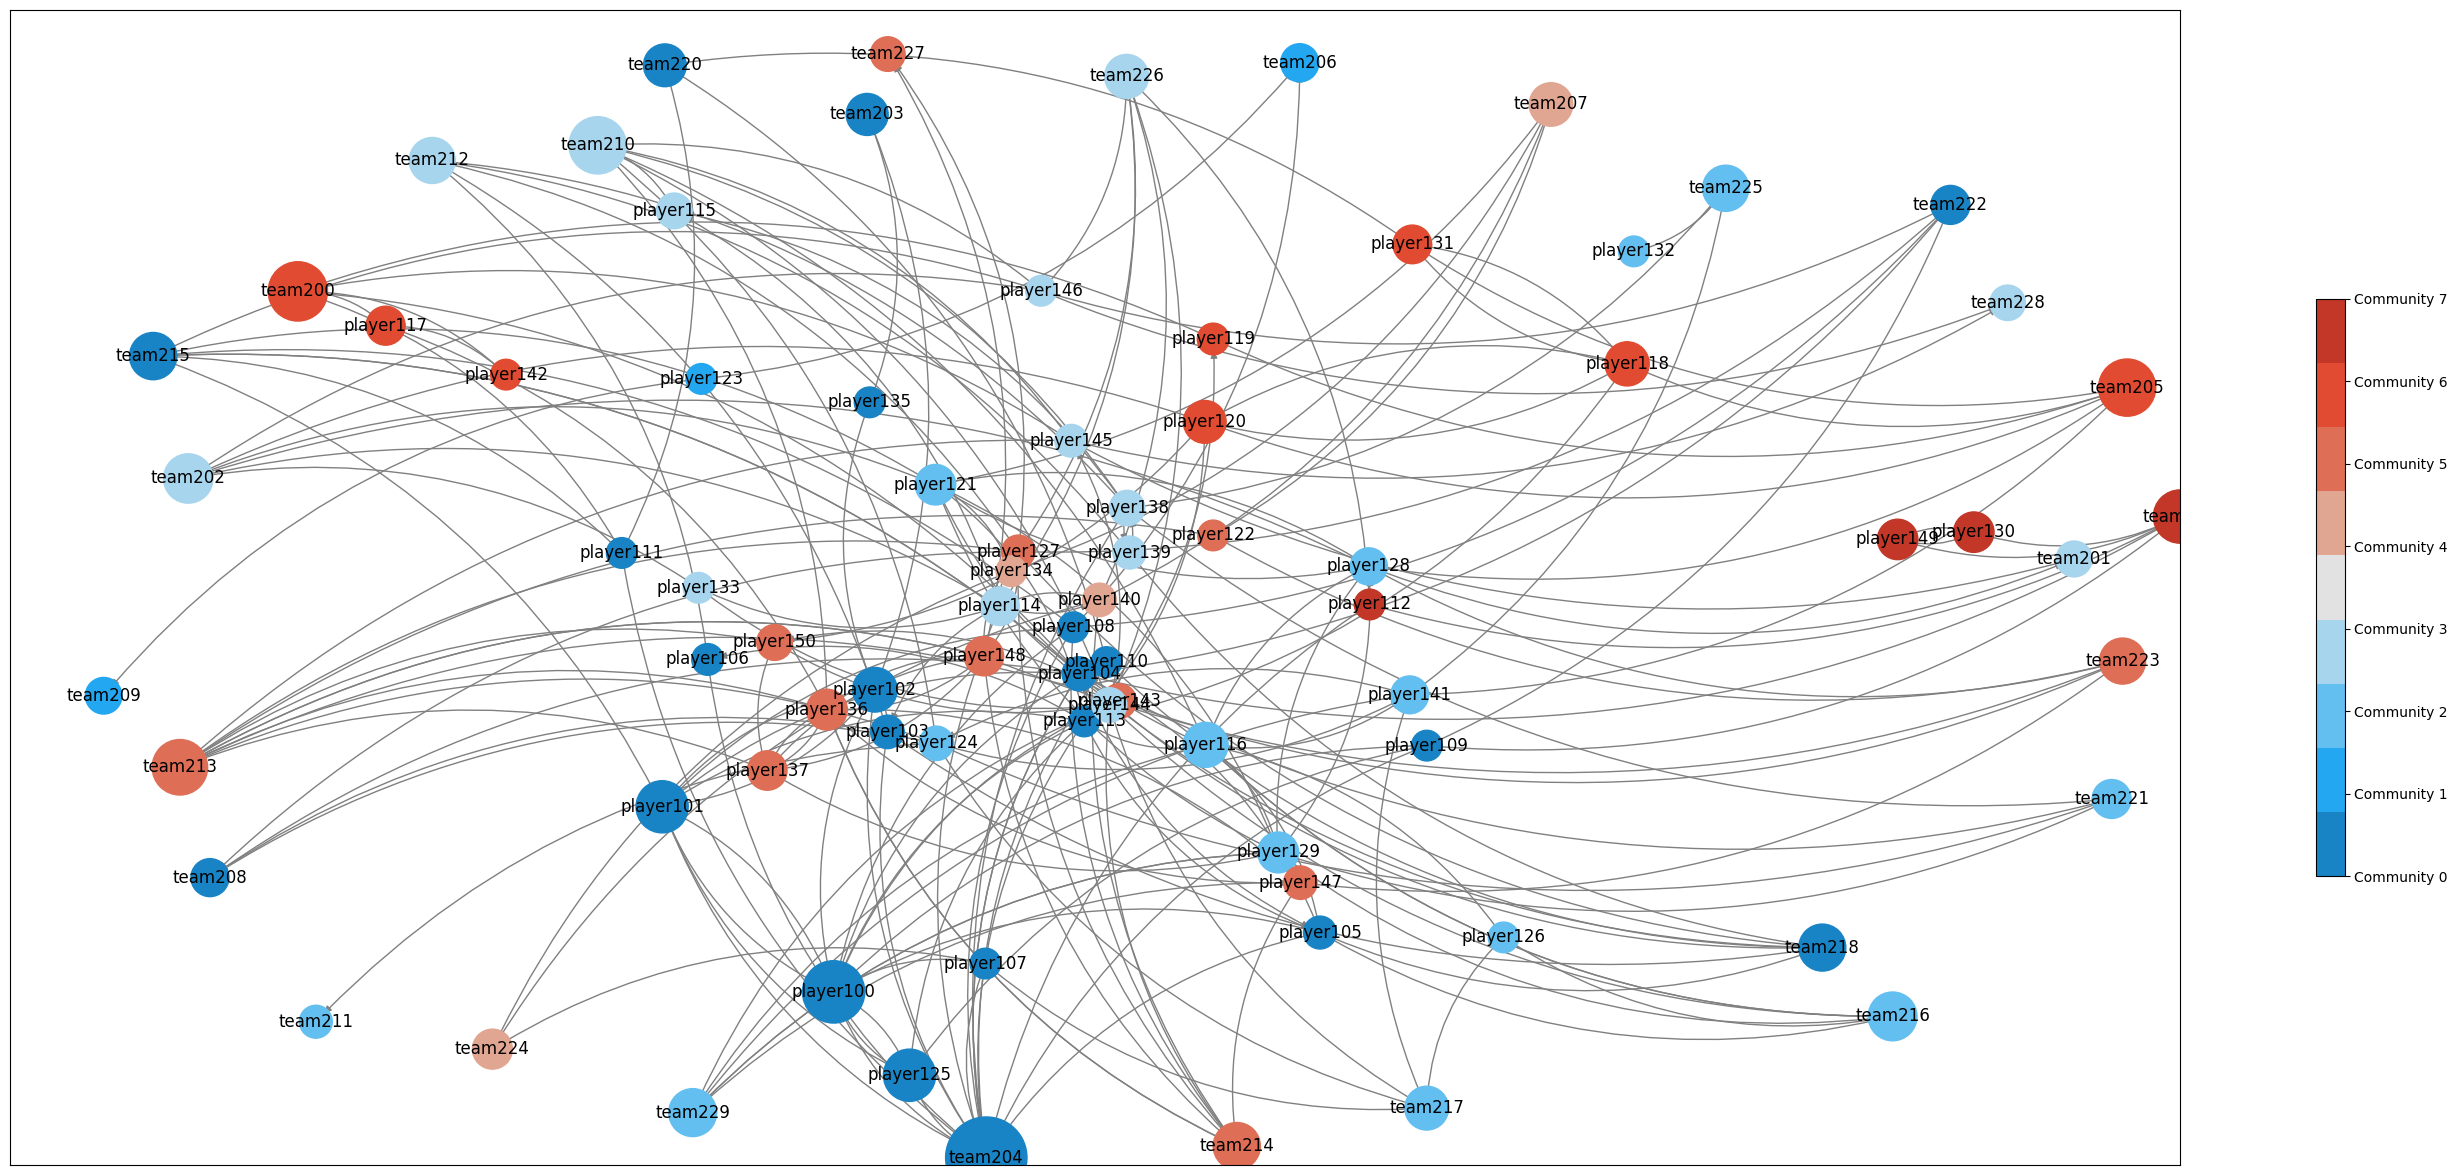

In [8]:
from matplotlib.colors import ListedColormap


def draw_graph_louvain_pr(G, pr_result, louvain_result, colors=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]):
    # Define positions for the nodes
    pos = nx.spring_layout(G)

    # Create a figure and set the axis limits
    fig, ax = plt.subplots(figsize=(35, 15))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    # Create a colormap from the colors list
    cmap = ListedColormap(colors)

    # Draw the nodes and edges of the graph
    node_colors = [louvain_result[node] for node in G.nodes()]
    node_sizes = [70000 * pr_result[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, node_color=node_colors, node_size=node_sizes, cmap=cmap, vmin=0, vmax=max(louvain_result.values()))

    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color='gray', width=1, connectionstyle='arc3, rad=0.2', arrowstyle='-|>', arrows=True)

    # Extract edge labels as a dictionary
    edge_labels = nx.get_edge_attributes(G, 'label')

    # Add edge labels to the graph
    for edge, label in edge_labels.items():
        ax.text((pos[edge[0]][0] + pos[edge[1]][0])/2,
                (pos[edge[0]][1] + pos[edge[1]][1])/2,
                label, fontsize=12, color='black', ha='center', va='center')

    # Add node labels to the graph
    node_labels = {n: G.nodes[n]['label'] if 'label' in G.nodes[n] else n for n in G.nodes()}
    nx.draw_networkx_labels(G, pos=pos, ax=ax, labels=node_labels, font_size=12, font_color='black')

    # Add colorbar for community colors
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(louvain_result.values())))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, ticks=range(max(louvain_result.values()) + 1), shrink=0.5)
    cbar.ax.set_yticklabels([f'Community {i}' for i in range(max(louvain_result.values()) + 1)])

    # Show the figure
    plt.show()


draw_graph_louvain_pr(G, pr_result=pr_result, louvain_result=louvain_result)